In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline

from pathlib import Path

In [2]:
from scipy.interpolate import griddata

In [3]:
vc = pd.read_csv('../datos/dataframes_VC/PED/vc_PED.csv', index_col = 0)
vc.index = pd.to_datetime(vc.index)

In [4]:
vc_day = vc.between_time('08:00', '18:00')

In [5]:
xmin, xmax = vc['pblh'].min(), vc['pblh'].max()
ymin, ymax = vc['u_mean'].min(), vc['u_mean'].max()

In [6]:
ny, nx = 512, 512
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)
xxx, yyy = np.meshgrid(xi, yi)
VC_grid = xi*yi

# PBLH - U diagrams with pollution concentrations

## Binned plots

In [7]:
x_bin = vc_day.dropna().pblh
y_bin = vc_day.dropna().u_mean
o3_bins = vc_day.dropna().O3
pm25_bins = vc_day.dropna()['PM2.5']
pm10_bins = vc_day.dropna()['PM10']

In [8]:
n_bins = 200

In [9]:
o3_field, x_bins, y_bins, c = stats.binned_statistic_2d(x_bin, y_bin, o3_bins,'mean', bins = n_bins)
pm25_field, x_bins, y_bins, c = stats.binned_statistic_2d(x_bin, y_bin, pm25_bins,'mean', bins = n_bins)
pm10_field, x_bins, y_bins, c = stats.binned_statistic_2d(x_bin, y_bin, pm10_bins,'mean', bins = n_bins)

In [10]:
dx = (x_bins[2] - x_bins[1])/2

In [11]:
dy = (y_bins[2] - y_bins[1])/2

In [12]:
XX, YY = np.meshgrid(x_bins[:n_bins] - dx, y_bins[:n_bins] - dy)

In [13]:
ny, nx = 512, 512

xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)
xxx, yyy = np.meshgrid(xi, yi)
VC_grid = xxx*yyy

In [14]:
data_bin = pd.DataFrame({'pblh_bin': XX.reshape(n_bins*n_bins), 
                         'u_bin': YY.reshape(n_bins*n_bins), 
                         'o3_bin': o3_field.T.reshape(n_bins*n_bins), 
                         'pm25_bin': pm25_field.T.reshape(n_bins*n_bins), 
                         'pm10_bin': pm10_field.T.reshape(n_bins*n_bins)})

In [15]:
points = data_bin.dropna()[['pblh_bin', 'u_bin']].values

### Ozone

In [16]:
z_o3 = griddata(points, data_bin.dropna()['o3_bin'].values, (xxx, yyy), method='nearest', )
z_linear = griddata(points, data_bin.dropna()['o3_bin'].values, (xxx, yyy), method='linear', rescale=True)
#z_counts = griddata(points, data_bin.dropna()['counts'].values, (xxx, yyy), method='linear', rescale=True)

z_o3 = np.ma.array(z_o3, mask=(~np.isfinite(z_linear)))

Text(0.5, 1.0, 'Ozone all stations')

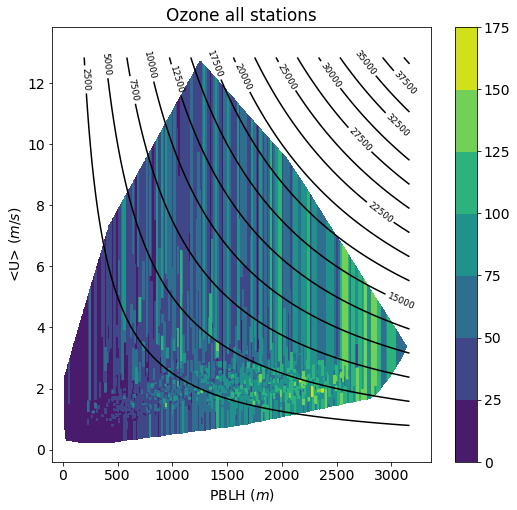

In [17]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (8.5,8))

ax = fig.add_subplot(111)
#ax.scatter(vc_day.pblh, vc_day.u_mean)
im = ax.contourf(xxx, yyy, z_o3, cmap = 'viridis')

fig.colorbar(im, ax=ax)
CS = ax.contour(xxx,yyy, VC_grid, 17, colors='k')
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')


ax.set_ylabel('<U> ($m/s$)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, ymax + 1)
ax.set_xlim(-100, xmax + 200)
ax.set_title('Ozone all stations')
#ax.grid()


### PM2.5

In [18]:
z_pm25 = griddata(points, data_bin.dropna()['pm25_bin'].values, (xxx, yyy), method='nearest', rescale=True)
z_pm25 = np.ma.array(z_pm25, mask=(~np.isfinite(z_linear)))

Text(0.5, 1.0, '$PM_{2.5}$ all stations')

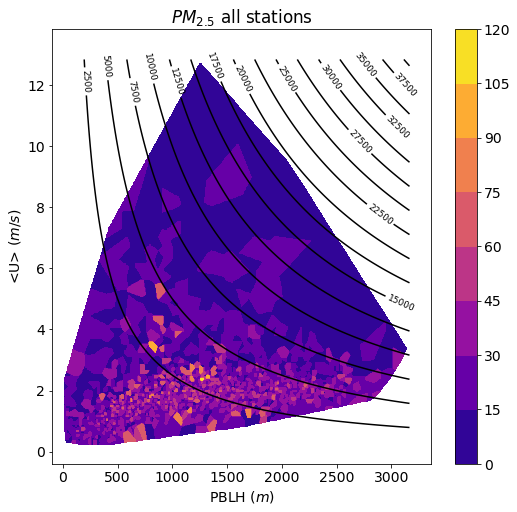

In [19]:
fig = plt.figure(figsize = (8.5,8))

ax = fig.add_subplot(111)
#ax.scatter(vc_day.pblh, vc_day.u_mean)
im = ax.contourf(xxx, yyy, z_pm25, cmap = 'plasma')

fig.colorbar(im, ax=ax)
CS = ax.contour(xxx,yyy, VC_grid, 17, colors='k')
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')


ax.set_ylabel('<U> ($m/s$)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, ymax + 1)
ax.set_xlim(-100, xmax + 200)
ax.set_title(r'$PM_{2.5}$ all stations')
#ax.grid()


### PM10

In [20]:
3500/35

100.0

In [21]:
data_bin.dropna()['pm10_bin'].max()

181.0

In [22]:
z_pm10 = griddata(points, data_bin.dropna()['pm10_bin'].values, (xxx, yyy), method='nearest', rescale=True)
z_pm10 = np.ma.array(z_pm10, mask=(~np.isfinite(z_linear)))

(-100, 3366.63)

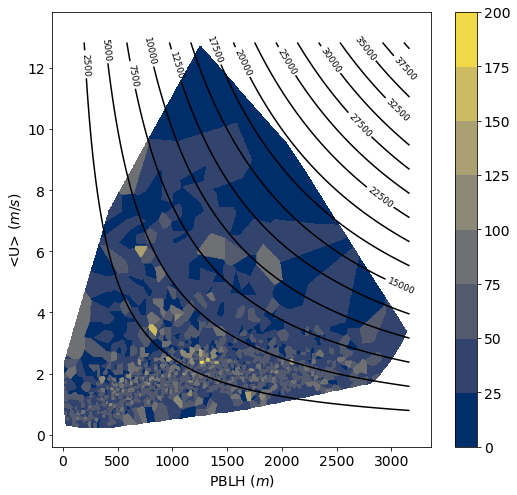

In [23]:
fig = plt.figure(figsize = (8.5,8))

ax = fig.add_subplot(111)
#ax.scatter(vc_day.pblh, vc_day.u_mean)
im = ax.contourf(xxx, yyy, z_pm10, cmap = 'cividis')

fig.colorbar(im, ax=ax)
CS = ax.contour(xxx,yyy, VC_grid, 17, colors='k')
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')


ax.set_ylabel('<U> ($m/s$)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, ymax + 1)
ax.set_xlim(-100, xmax + 200)
#ax.grid()


## not binned

In [24]:
points_2 = np.array([vc_day.dropna().pblh.values, vc_day.dropna().u_mean.values]).T
values_2 = vc_day.dropna().O3.values

# Counts and Probability 

In [25]:
counts, x_bins, y_bins, c = stats.binned_statistic_2d(x_bin, y_bin, values_bins,'count', bins = n_bins)

NameError: name 'values_bins' is not defined

NameError: name 'z_counts' is not defined

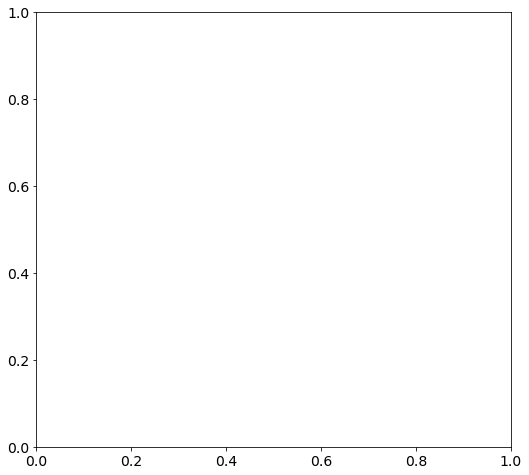

In [26]:
fig = plt.figure(figsize = (8.5,8))

ax = fig.add_subplot(111)
#ax.scatter(vc_day.pblh, vc_day.u_mean)
im = ax.contourf(xxx, yyy, z_counts*uuu)

fig.colorbar(im, ax=ax)
CS = ax.contour(xxx,yyy, VC_grid, 17, colors='k')
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')


ax.set_ylabel('<U> ($m/s$)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, ymax + 1)
ax.set_xlim(-100, xmax + 200)
#ax.grid()


(-100, 3366.63)

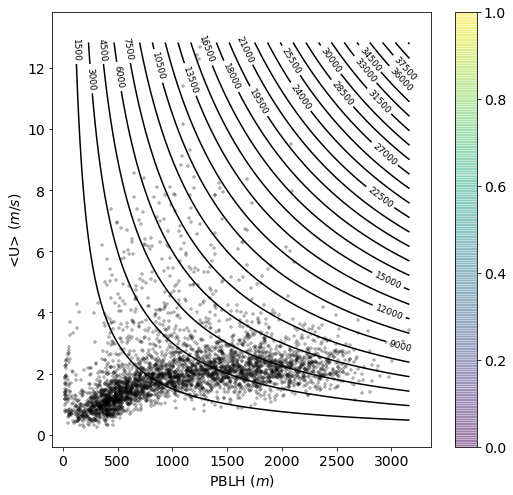

In [27]:
fig = plt.figure(figsize = (8.5,8))

ax = fig.add_subplot(111)
#ax.scatter(vc_day.pblh, vc_day.u_mean)
im = ax.scatter(vc_day.pblh, vc_day.u_mean, s = 10, marker = '+', color = 'k', alpha=0.3)

fig.colorbar(im, ax=ax)
CS = ax.contour(xi,yi,VC_grid, 15, colors='k', vmin = 500, levels = 30)
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')


ax.set_ylabel('<U> ($m/s$)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, ymax + 1)
ax.set_xlim(-100, xmax + 200)

# Areas

In [28]:
vc.loc["2015-04-20 00:00":"2015-04-20 23:00"]

,VC,pblh,u_mean,O3,PM2.5,PM10
2015-04-20 00:00:00,29.0,19.67,1.50,12.0,15.0,26.0
2015-04-20 01:00:00,102.0,34.92,2.77,21.0,12.0,20.0
2015-04-20 02:00:00,118.0,33.74,3.37,28.0,13.0,18.0
2015-04-20 03:00:00,180.0,47.19,3.75,30.0,7.0,12.0
2015-04-20 04:00:00,169.0,42.63,3.69,23.0,10.0,15.0
2015-04-20 05:00:00,51.0,23.60,1.95,20.0,12.0,18.0
2015-04-20 06:00:00,182.0,53.55,3.48,6.0,3.0,15.0
2015-04-20 07:00:00,170.0,48.74,3.48,3.0,4.0,28.0
2015-04-20 08:00:00,137.0,315.20,0.44,5.0,32.0,65.0
2015-04-20 09:00:00,660.0,653.43,1.01,17.0,19.0,44.0


In [29]:
labels = ["{}".format(i) for i in range(0,24)]

Text(0.5, 1.0, '$PM_{2.5}$ all stations')

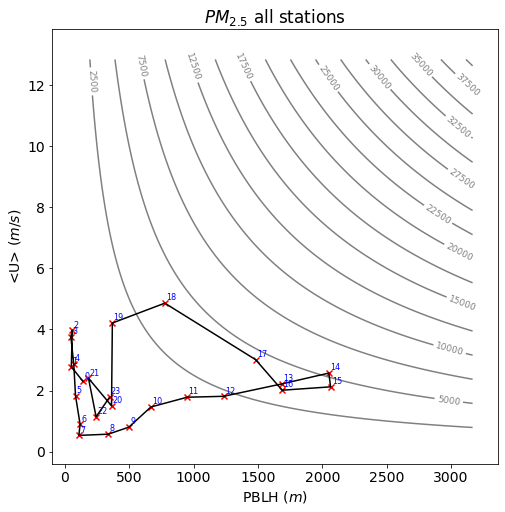

In [30]:
labels = ["{}".format(i) for i in range(0,24)]

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(111)
#ax.scatter(vc_day.pblh, vc_day.u_mean)
#ax.plot(vc["2015-04-20 00:00":"2015-04-20 23:00"]['pblh'], vc["2015-04-20 00:00":"2015-04-20 23:00"]['u_mean'])
#ax.plot(vc["2015-03-20 00:00":"2015-03-20 23:00"]['pblh'], vc["2015-03-20 00:00":"2015-03-20 23:00"]['u_mean'])
ax.plot(vc["2015-07-20 00:00":"2015-07-20 23:00"]['pblh'], vc["2015-05-20 00:00":"2015-05-20 23:00"]['u_mean'], c = 'k')
ax.scatter(vc["2015-07-20 00:00":"2015-07-20 23:00"]['pblh'], vc["2015-05-20 00:00":"2015-05-20 23:00"]['u_mean'], c = 'r', marker = 'x')

for i in range(0, 24):
    ax.text(vc["2015-07-20 00:00":"2015-07-20 23:00"]['pblh'][i]+10,
            vc["2015-05-20 00:00":"2015-05-20 23:00"]['u_mean'][i]+0.1, i, size = 8, c = 'b')
#fig.colorbar(im, ax=ax)
CS = ax.contour(xxx,yyy, VC_grid, 17, colors='gray')
ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')


ax.set_ylabel('<U> ($m/s$)')
ax.set_xlabel('PBLH ($m$)')
ax.set_ylim(-0.4, ymax + 1)
ax.set_xlim(-100, xmax + 200)
ax.set_title(r'$PM_{2.5}$ all stations')
#ax.grid()


In [397]:
def area_regular_polygon(points):
    """ Function to approximate an integral using the left rectangle method.
    
    Parameters
    ----------
    x : numpy array
        Array representing the discretization of the integration domain
        [a, a+h, a+2h, ..., b-h, b] where a and b are the bounds of
        integration.
    func  : python function
        Function to be integrated
    
    Output
    ----------
    I : float
        Approached integral computed
    """
    
    x = points[:,0]
    y = points[:,1]

    Δx = x[1:] - x[:-1]
    
    I = Δx*(y[1:] + y[:-1])/2
    
    return abs(I.sum())

    #return I.sum()
    #h = x[1] - x[0] #assuming that the step is constant.
    
    #return func(x).sum() * h #Integrating

In [295]:
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
def make_integration_boxes(ax, x, y, facecolor='r',edgecolor='None', alpha=0.5):
    """Function to create patches using the Left Rectangle Method. 
    We assume that the domain of integration `x` is equally spaced. 
    
    Parameters
    ----------
    ax : AxesSubplot
        e.g. fig, ax = plt.subplots(1)
    x : array
        Domain of integration with a constant step of discretization. 
    y  : python ytion
        Function to be integrated
    facecolor : color of the interior of the rectangles.
    edgecolor : color of the edges of the rectangles.
    alpha : tranparency of rectangle.
    
    Output
    ----------
    pc : patch collection
        e.g. ax.add_collection(pc)
    
    """
    # Create list for all the error patches
    integration_boxes = []

    # Loop over data points; create box from errors at each point
    for i in range(0, len(x)-1):
        width = x[i+1] - x[i]
        XY = np.array([[x[i], 0], [x[i+1], 0], [x[i+1], y[i+1]], [x[i], y[i]]])
        rect = patches.Polygon(XY, closed = True)
        integration_boxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(integration_boxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)
    # Add collection to axes
    #ax.add_collection(pc)

    return pc

In [403]:
x_p = np.array([1,2,2.3,2.2,3,3.2,2.5,1.1,1])
y_p = np.array([1,1,2.0,2.9,3,2.0,2.5,2.0,1])

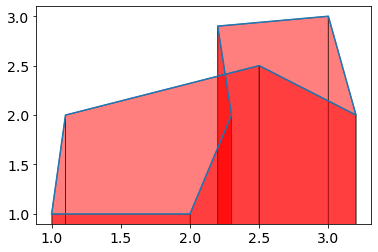

In [404]:
# f1
x_domain = np.linspace(0, 2, 20)

fig, ax = plt.subplots(1)

ax.plot(x_p, y_p)
# Call function to create error boxes
ppatch = make_integration_boxes(ax, x_p, y_p, edgecolor = 'k')
ax.add_collection(ppatch)
#ax.grid()

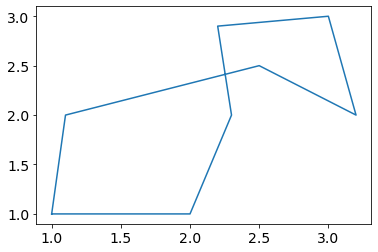

In [405]:
plt.plot(x_p, y_p)

In [149]:
area_irregular_polygon(x_p, y_p)

1.3992857142857145

In [157]:
x_p_2 = np.array([1,2,2,2,2.5,2.5,3,3,2,1,1])
y_p_2 = np.array([1,1,2,3,3,2.5,2.5,2,2,2,1])

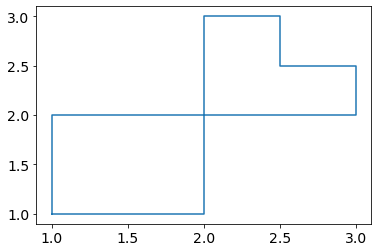

In [158]:
plt.plot(x_p_2, y_p_2)

In [159]:
area_irregular_polygon(x_p_2, y_p_2)

1.55

In [513]:

def in_or_out(points, x, y):

    """
        in_or_out(points, x, y)

    Función que evalua si un punto dado por `x` y `y` está dentro de una figura dada por una pointsmetrización
    en forma de un array `points` creado usando la función `condiones_iniciales_2D`.

    """
    
    crossings = 0
    
    for i in range(1,len(points[0,:])):
        
        if x < points[0, i-1] and x < points[0, i] or x > points[0, i-1] and x > points[0, i]:
            
            pass
            
        elif y > points[1,i-1] and y > points[1, i]:
            
            pass
    
        elif y < points[1,i-1] and y < points[1, i]:
            
            if x < points[0, i-1] and x > points[0, i] or x > points[0, i-1] and x < points[0, i]:
                
                crossings += 1

            
        elif y > points[1, i-1] and y < points[1, i]:
            
            if x > points[0, i-1] and x < points[0, i]:
                
                y_c = points[1,i-1] + (points[1, i] - points[1, i-1])*(x - points[0, i-1])/(points[0, i] - points[0, i-1])
                
                if y_c > y:
                    
                    crossings += 1
                    
                
        elif y < points[1, i-1] and y > points[1, i]:
            
            if x < points[0, i-1] and x > points[0, i]:
                
                y_c = points[1, i] + (points[1, i-1] - points[1, i])*(x - points[0, i])/(points[0, i-1] - points[0, i])

                if y_c > y:

                    crossings += 1
                    
    result = True
    
    if (crossings % 2) == 0:  
        result = False
    
    else:
        pass
    
    return result


In [514]:
def find_area(polygon, N):
    
    x_min = polygon[:,0].min()
    x_max = polygon[:,0].max()
    y_min = polygon[:,1].min()
    y_max = polygon[:,1].max()
    
    area_rectangle = (x_max - x_min)*(y_max - y_min)
    inside = 0 
    
    for i in range(0, N):
        x = np.random.rand() * (x_max - x_min) + x_min
        y = np.random.rand() * (y_max - y_min) + y_min
        
        if in_or_out(polygon.T, x, y) == True:

            inside += 1
                
    return area_rectangle * inside/N
            
    

In [515]:
A = np.array(([1,2,2,2,2.5,2.5,3,3,2,1,1], [1,1,2,3,3,2.5,2.5,2,2,2,1])).T

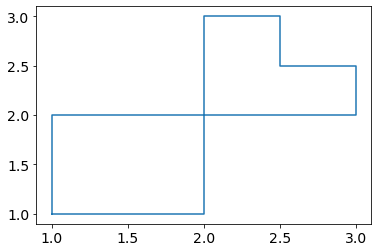

In [516]:
plt.plot(A[:,0], A[:,1])

In [517]:
find_area(A, 10000)

1.7528

In [518]:
x_p = np.array([1,2,2.3,2.2,3,3.2,2.5,1.1,1])
y_p = np.array([1,1,2.0,2.9,3,2.0,2.5,2.0,1])
Pol_A = np.array((x_p, y_p)).T

In [520]:
find_area(Pol_A, 100000)

1.942116

# Back with VC

In [525]:
A = vc["2015-04-20 00:00":"2015-04-20 23:00"][['pblh', 'u_mean']].values

In [531]:
find_area(A, 10000)

7950.1797876599985

In [536]:
vc.keys()

Index(['VC', 'pblh', 'u_mean', 'O3', 'PM2.5', 'PM10'], dtype='object')

In [607]:

days = pd.date_range('2015-01-01', '2015-12-31')
VC_areas = []
pm = []

for j, day in enumerate(days):
    
    d = "{}".format(day.date())
    
    area = vc.loc[d][['pblh', 'u_mean']]
    pm10 = vc.loc[d]['PM10'].max()
    pm2 = vc.loc[d]['PM2.5'].max()
    o3 = vc.loc[d]['O3'].max()
    
    #VC_areas.append(find_area(area.values, 1000))
    #pm.append(pollution)
    
    #Plotting
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111)
    ax.plot(area['pblh'], area['u_mean'], c = 'k')
    ax.scatter(area['pblh'], area['u_mean'], c = 'r', marker = 'x')

    for i in range(0, 24):
        ax.text(area['pblh'][i]+10,area['u_mean'][i]+0.1, i, size = 8, c = 'b')
    CS = ax.contour(xxx,yyy, VC_grid, 17, colors='gray')
    ax.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')
    
    ax.text(0, 13, "PM10 = {}".format('%0.0f'%pm10), size = 13, c = 'k')
    ax.text(1250, 13, "PM2.5 = {}".format('%0.0f'%pm2), size = 13, c = 'k')
    ax.text(2500, 13, "O3 = {}".format('%0.0f'%o3), size = 13, c = 'k')
    
    
    ax.set_ylabel('<U> ($m/s$)')
    ax.set_xlabel('PBLH ($m$)')
    ax.set_ylim(-0.4, ymax + 1)
    ax.set_xlim(-100, xmax + 200)
    ax.set_title(d)
    plt.savefig('../graficas/areas_diurnas/PED{}.png'.format('%03.0f'%j))
    plt.close()
    

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

In [566]:
np.polyfit(np.array(VC_areas), np.array(pm), deg = 1)

LinAlgError: SVD did not converge in Linear Least Squares

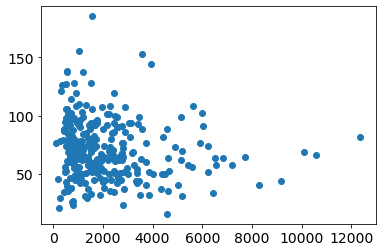

In [564]:
plt.scatter(VC_areas, pm)

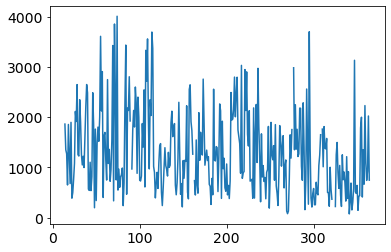

In [561]:
plt.plot(VC_areas)

In [464]:
vc

,VC,pblh,u_mean,O3,PM2.5,PM10
2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,NaN,NaN,NaN,NaN,123.0,159.0
2015-01-01 02:00:00,NaN,NaN,NaN,NaN,140.0,178.0
2015-01-01 03:00:00,NaN,NaN,NaN,NaN,133.0,168.0
2015-01-01 04:00:00,NaN,NaN,NaN,NaN,133.0,167.0
...,...,...,...,...,...,...
2015-12-31 19:00:00,450.0,168.73,2.15,38.0,NaN,NaN
2015-12-31 20:00:00,376.0,154.73,1.86,24.0,NaN,NaN
2015-12-31 21:00:00,768.0,327.48,1.96,20.0,NaN,NaN
2015-12-31 22:00:00,403.0,184.21,1.72,11.0,NaN,NaN


In [38]:
vc.between_time('6:00', '6:59')

,VC,pblh,u_mean,O3,PM2.5,PM10
2015-01-01 06:00:00,NaN,NaN,NaN,NaN,118.0,147.0
2015-01-02 06:00:00,NaN,NaN,NaN,NaN,2.0,5.0
2015-01-03 06:00:00,NaN,NaN,NaN,NaN,1.0,5.0
2015-01-04 06:00:00,NaN,NaN,NaN,NaN,10.0,14.0
2015-01-05 06:00:00,NaN,NaN,NaN,NaN,5.0,7.0
...,...,...,...,...,...,...
2015-12-27 06:00:00,50.0,50.82,0.92,12.0,NaN,NaN
2015-12-28 06:00:00,128.0,33.99,3.60,20.0,NaN,NaN
2015-12-29 06:00:00,156.0,60.44,2.67,15.0,NaN,NaN
2015-12-30 06:00:00,31.0,19.46,1.59,3.0,NaN,NaN


In [40]:
from matplotlib.gridspec import GridSpec

In [49]:
for h in range(0,24):
    print(h)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


0
1
2
3
4


ValueError: autodetected range of [nan, nan] is not finite

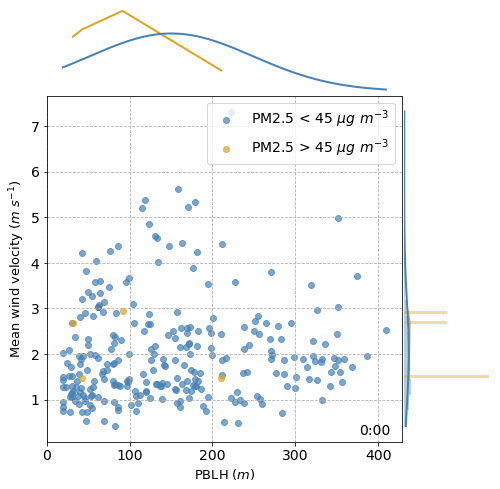

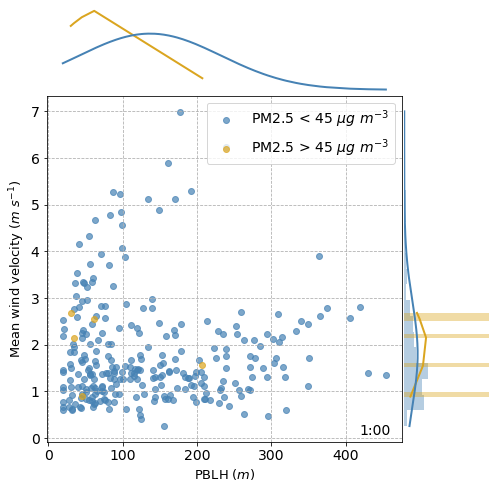

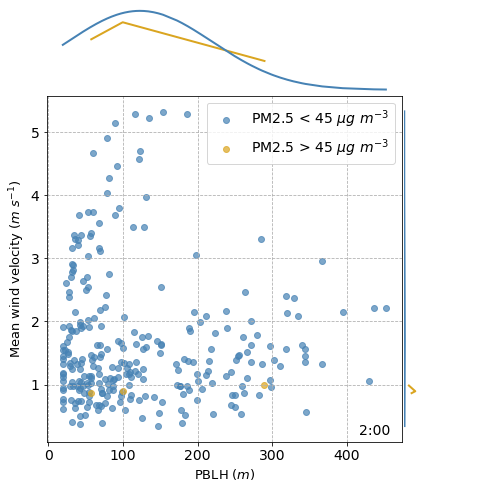

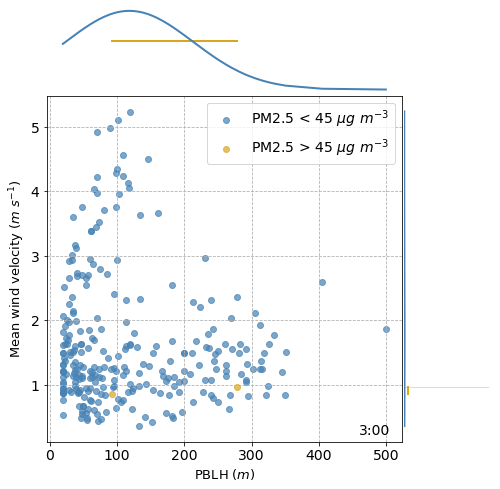

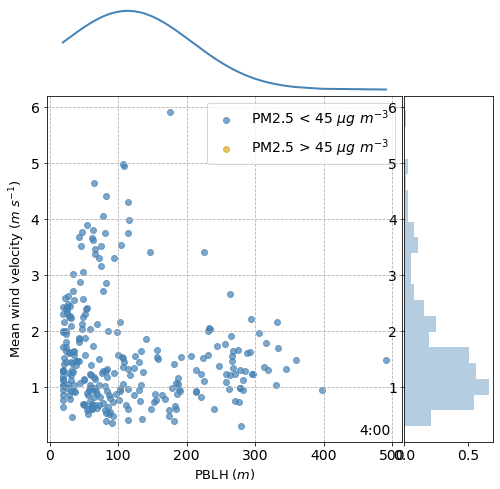

In [52]:
color_1 = 'goldenrod'
color_2 = 'steelblue'
nom_pm25 = 45

for hour in range(0,24):
    print(hour)
    #hour = 12
    hourly = vc.between_time(f'{hour}:00', f'{hour}:59')

    h = sorted(hourly.loc[hourly['PM2.5'] > nom_pm25]['pblh'].dropna())
    j = sorted(hourly.loc[hourly['PM2.5'] < nom_pm25]['pblh'].dropna())

    fit_h = stats.norm.pdf(h, np.mean(h), np.std(h))
    fit_j = stats.norm.pdf(j, np.mean(j), np.std(j))

    k = sorted(hourly.loc[hourly['PM2.5'] > nom_pm25]['u_mean'].dropna())
    l = sorted(hourly.loc[hourly['PM2.5'] < nom_pm25]['u_mean'].dropna())

    fit_k = stats.norm.pdf(k, np.mean(k), np.std(k))
    fit_l = stats.norm.pdf(l, np.mean(l), np.std(l))

    fig = plt.figure(figsize=(8,8))
    gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], wspace=0.01, hspace=0.01)

    ax1 = fig.add_subplot(gs[0])
    #ax1.hist(hourly.loc[hourly['PM2.5'] < nom_pm25]['pblh'], density=True, alpha=0.4, color=color_2, bins=15)
    #ax1.hist(hourly.loc[hourly['PM2.5'] > nom_pm25]['pblh'], density=True, alpha =0.4, color=color_1, bins=15)
    ax1.plot(h,fit_h, c = color_1, linewidth=2)
    ax1.plot(j,fit_j, c = color_2, linewidth=2)
    ax1.set_axis_off()

    ax2 = fig.add_subplot(gs[1])
    ax2.set_axis_off()

    ax3 = fig.add_subplot(gs[2])
    #CS = ax3.contour(xi,yi,VC_grid, colors='k', levels=[3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000],alpha = 0.7)
    #ax3.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')
    ax3.scatter(hourly.loc[hourly['PM2.5'] < nom_pm25]['pblh'], hourly.loc[hourly['PM2.5'] < nom_pm25]['u_mean'], 
                c = color_2, alpha = 0.7, label = r"PM2.5 < 45 $\mu g \ m^{-3}$")
    ax3.scatter(hourly.loc[hourly['PM2.5'] > nom_pm25]['pblh'], hourly.loc[hourly['PM2.5'] > nom_pm25]['u_mean'], 
                c = color_1, alpha = 0.7, label = r"PM2.5 > 45 $\mu g \ m^{-3}$")
    ax3.set_xlabel(r'PBLH ($m$)', fontsize = 13)
    ax3.set_ylabel(r'Mean wind velocity ($m \ s^{-1}$)', fontsize = 13)
    ax3.text(0.88, 0.02, f'{hour}:00', transform=ax3.transAxes)
    ax3.legend()
    ax3.grid(linestyle='--')

    ax4 = fig.add_subplot(gs[3])
    ax4.hist(hourly.loc[hourly['PM2.5'] < nom_pm25]['u_mean'],density = True, alpha = 0.4, color = color_2, bins = 20, 
             orientation = "horizontal")
    ax4.hist(hourly.loc[hourly['PM2.5'] > nom_pm25]['u_mean'],density = True, alpha = 0.4, color = color_1, bins = 20,
            orientation = "horizontal")
    ax4.plot(fit_k, k, c = color_1, linewidth=2)
    ax4.plot(fit_l, l, c = color_2, linewidth=2)
    ax4.set_axis_off()